# Tarea 2
## David Leonardo Galicia Praskauer

### Histograma

In [79]:
azar = randn(10000)
"""
Genera un vector bin para graficar un histograma, de un arreglo de datos.
Esta función hace solamente una lectura de los datos.
"""
function histo (datos::Array,N_hist::Int64)
    datos = azar
    sort!(datos) #orden
    sup = datos[end] 
    inf = datos[1]
    dx = (sup - inf)/ N_hist #largo intervalo
    bin = zeros(Int64,N_hist) #genero bin para contar repeticiones
    for i = 1 : length(datos)
            x1 = inf
        for j = 1 : N_hist
            x2 = x1 + dx
            if datos[i] <= x2
                bin[j] += 1
                break
            else
                x1 += dx
            end
        end
    end
    return bin
end

histo (generic function with 1 method)

In [80]:
bin2 = histo(azar,100);

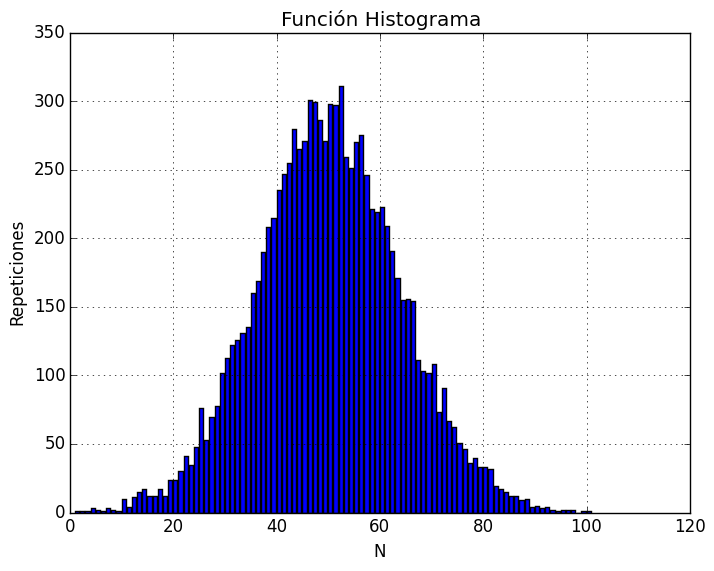

In [81]:
using PyPlot
bar(1:100,bin2)
grid("on")
xlabel("N")
ylabel("Repeticiones")
title("Función Histograma");

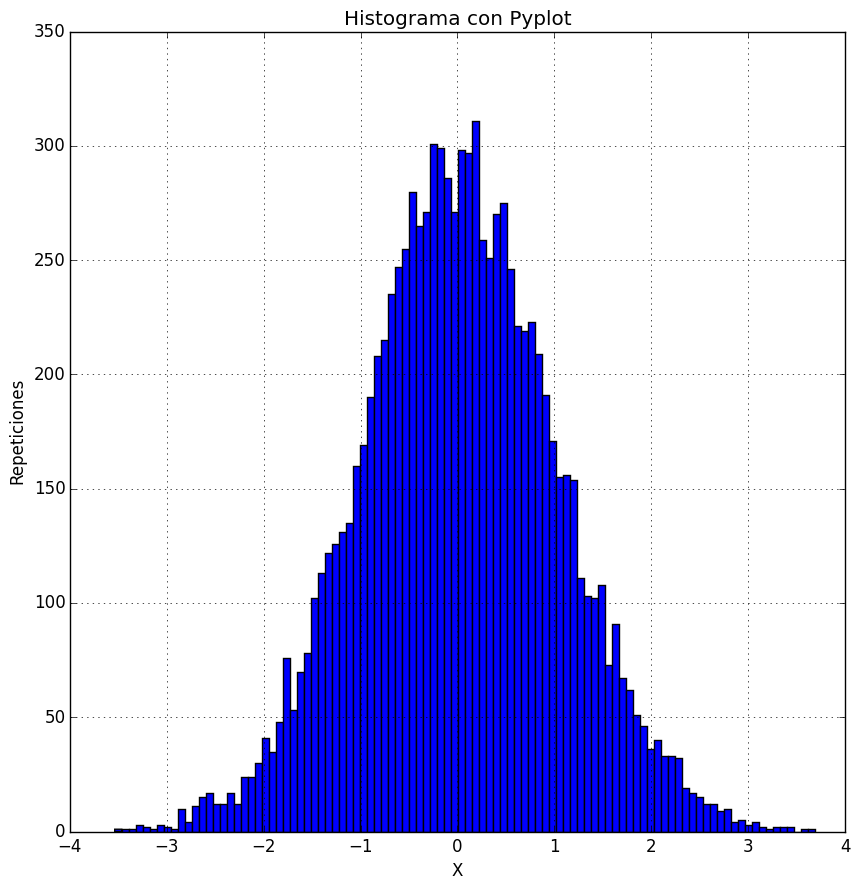

In [82]:
fig = figure("pyplot_histogram",figsize=(10,10))
ax = axes()
h = plt[:hist](azar,100)

grid("on")
xlabel("X")
ylabel("Repeticiones")
title("Histograma con Pyplot");

Vemos que la única diferencia entre la función que definimos y la nativa en PyPlot es que en la nueva función el eje X indica en que número de intervalo (N) se encuentran los datos, mientras que la función de PyPlot indica explícitamente en que intervalo están ($[x_i,x_{i+1})$).

### Promedio y varianza
#### a)

Primero definamos las funciones varianza y promedio de un array cualquiera. Por el momento haremos todas las pruebas con el array azar que ya definimos.

In [83]:
"""
Función que calcula el promedio de un arreglo de datos.
"""

function promedio(dist::Array)
    suma = 0.0
    for i in dist
        suma += i
    end
    return suma/(length(dist))
end

promedio (generic function with 1 method)

In [84]:
"""
Función que calcula la varianza de un arreglo de datos usando desviaciones
cuadradas en lugar del promedio.
"""

function var_cuadrados(dist::Array)
    suma = 0.0
    for i in dist
        for j in dist
            suma += ((i - j)^2)/2
        end
    end
    return suma/(length(dist)^2)
end

var_cuadrados (generic function with 1 method)

In [85]:
promedio(azar), mean(azar)

(0.01477237866879338,0.014772378668795227)

In [86]:
var(azar), var_cuadrados(azar)

(1.0047157293008557,1.0046152577280705)

Vemos que dan valores muy cercanos a las funciones nativas de Julia. Sin embargo la función varianza se sintió algo lenta las primeras veces que la corrí, por esto decidí definir otra varianza usando otra definición (la que utiliza el promedio) para ver si es más rápido.

In [87]:
"""
Función con dos métodos que calcula la varianza de un array. Puede tener como
argumento solamente el array o el array y su priomedio para agilizar el cálculo.
"""
function var_expect(dist::Array)
    suma = 0.0
    for i in dist
        suma += (i - promedio(dist))^2
    end
    return suma/(length(dist))
end

#Definimos un segundo método para calcular la varianza cuando ya sabemos el
#valor de expectación de la distribución, así ahorramos tiempo.
function var_expect(dist::Array,prom::Float64)
    suma = 0.0
    for i in dist
        suma += (i - prom)^2
    end
    return suma/(length(dist))
end    

var_expect (generic function with 2 methods)

In [88]:
var_expect(azar), var_expect(azar,promedio(azar))

(1.0046152577279275,1.0046152577279275)

In [100]:
@time promedio(azar)
@time mean(azar)
@time var_cuadrados(azar)
@time var_expect(azar)
@time var_expect(azar,promedio(azar))
@time var(azar);

elapsed time: 1.5304e-5 seconds (96 bytes allocated)
elapsed time: 1.148e-5 seconds (96 bytes allocated)
elapsed time: 0.125969666 seconds (96 bytes allocated)
elapsed time: 0.094168243 seconds (96 bytes allocated)
elapsed time: 2.2099e-5 seconds (112 bytes allocated)
elapsed time: 1.6696e-5 seconds (224 bytes allocated)


Usando un solo array de datos, comparando los tiempos vemos que: la función promedio es un poco más lenta que la función nativa. Las funciones para la varianza que no utilizan el promedio como argumento son significativamente más lentas que la función nativa, mientras que la que toma el promedio como argumento es ligeramente más rápida que la nativa. Más abajo probamos esto para datos de distinta longitud.

#### b)

In [90]:
"""
Función que calcula la varianza y el promedio de un arreglo de datos con
una sola lectura de los datos. 
"""
function varyprom(dist::Array)
    n = 0
    mean = 0.0
    M2 = 0.0
     
    for x in dist
        n += 1
        delta = x - mean
        mean += delta/n
        M2 += delta*(x - mean)
    end

    if n < 2
        return [NaN,NaN]
    else
        return [M2 /n,mean] #n y no n-1
    end
end

varyprom (generic function with 1 method)

Utilizo n y no n-1 pues n da la varianza que es la que hemos estado calculando, el algoritmo citado da la varianza con correción de Bessel.

In [101]:
@time varyprom(azar)

elapsed time: 0.000192433 seconds (176 bytes allocated)


2-element Array{Float64,1}:
 1.00462  
 0.0147724

Vemos que da los valores adecuados y el tiempo que tarda es mucho menor a las funciones que definimos (que no toman el promedio como argumento), y el tiempo es casi del mismo orden de magnitud que la función nativa.

#### c)

In [92]:
Cg = rand(-typemax(Int64):typemax(Int64),100) #L de larco, c de corto, g de grande, p de pequeño
Lg = rand(-typemax(Int64):typemax(Int64),10^5)
Cp = rand(-10^15:10^15,100)
Lp = rand(-10^15:10^15,10^5)

100000-element Array{Int64,1}:
  635317598140439
  899406039696024
  234306614109464
 -414561148336666
   97437144808107
 -918592503762544
 -183721096000853
 -775261526309870
  868857194352278
  811679779771312
 -319719708521351
  990351887821329
  763855544766328
                ⋮
  836728247213397
 -937110549485491
  311158664531669
 -282501346778362
 -580588987285707
 -487681200903902
  927021159286138
  435056502361778
  507908660288699
 -612921878377529
 -881280044330134
   85147895750525

In [102]:
@time promedio(Cg)
@time mean(Cg)
@time var_expect(Cg)
@time var_expect(Cg,promedio(Cg))
@time var(Cg)
@time varyprom(Cg);

elapsed time: 5.419e-6 seconds (96 bytes allocated)
elapsed time: 5.072e-6 seconds (96 bytes allocated)
elapsed time: 2.8632e-5 seconds (96 bytes allocated)
elapsed time: 6.211e-6 seconds (112 bytes allocated)
elapsed time: 9.762e-6 seconds (224 bytes allocated)
elapsed time: 6.132e-6 seconds (176 bytes allocated)


In [103]:
@time promedio(Cp)
@time mean(Cp)
@time var_expect(Cp)
@time var_expect(Cp,promedio(Cp))
@time var(Cp)
@time varyprom(Cp);

elapsed time: 6.633e-6 seconds (96 bytes allocated)
elapsed time: 5.388e-6 seconds (96 bytes allocated)
elapsed time: 3.4003e-5 seconds (96 bytes allocated)
elapsed time: 7.972e-6 seconds (112 bytes allocated)
elapsed time: 9.985e-6 seconds (224 bytes allocated)
elapsed time: 7.143e-6 seconds (176 bytes allocated)


In [104]:
@time promedio(Lp)
@time mean(Lp)
@time var_expect(Lp)
@time var_expect(Lp,promedio(Lp))
@time var(Lp)
@time varyprom(Lp);

elapsed time: 0.000356138 seconds (96 bytes allocated)
elapsed time: 0.000149474 seconds (96 bytes allocated)
elapsed time: 12.846744466 seconds (96 bytes allocated)
elapsed time: 0.000557347 seconds (112 bytes allocated)
elapsed time: 0.000163122 seconds (224 bytes allocated)
elapsed time: 0.001175611 seconds (176 bytes allocated)


In [105]:
@time promedio(Lg)
@time mean(Lg)
@time var_expect(Lg)
@time var_expect(Lg,promedio(Lg))
@time var(Lg)
@time varyprom(Lg);

elapsed time: 0.000133116 seconds (96 bytes allocated)
elapsed time: 5.7962e-5 seconds (96 bytes allocated)
elapsed time: 12.357523407 seconds (96 bytes allocated)
elapsed time: 0.000543646 seconds (112 bytes allocated)
elapsed time: 0.000184931 seconds (224 bytes allocated)
elapsed time: 0.001200452 seconds (176 bytes allocated)


### Integración por método de Simpson

In [97]:
"""
Usa la regla de Simpson compuesta para aproximar el valor de una integral
en un intervalo (a,b) dada una función f y un número n (par) para dividir
el intervalo original en n subintervalos.
"""
function abe_simpson(f::Function,a::Float64,b::Float64,n::Int64)
    if iseven(n) == false
        println("Se necesita que n sea par.")
        return s1 = NaN
    else
        n = abs(n)
        dx = (b - a) / n
        s1 = f(a) + f (b)
        for i = 1 : n
            s1 +=  2*f(a + i*dx)
        end
        for i = 1 : n-1
            s1 += 4*f(a + i*dx)
        end
    end
    return s2 = s1 * dx / 3
end

abe_simpson (generic function with 1 method)

In [98]:
abe_simpson(x->sin(x),0.0,10.0,10)

3.3663978533253913

In [99]:
abe_simpson(x->x^2,-1.0,1.0,1000)

1.3320026666666662

### Referencias
https://en.wikipedia.org/wiki/Simpson%27s_rule 

https://en.wikipedia.org/wiki/Variance#Discrete_random_variable

https://en.wikipedia.org/wiki/Arithmetic_mean

http://nbviewer.jupyter.org/github/gizmaa/Julia_Examples/blob/master/pyplot_histogram.ipynb

https://en.wikipedia.org/wiki/Algorithms_for_calculating_variance#Online_algorithm

Notebook de Luis y Arturo.